##importing libaries


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

##data processinng

Training image processing

In [24]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


validation image preprocessing


In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [26]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [27]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[184.5  171.5  178.5 ]
   [180.75 167.75 174.75]
   [183.5  170.5  177.5 ]
   ...
   [191.   178.   185.  ]
   [194.   181.   188.  ]
   [196.75 183.75 190.75]]

  [[173.5  160.5  167.5 ]
   [177.25 164.25 171.25]
   [182.75 169.75 176.75]
   ...
   [196.75 183.75 190.75]
   [188.   175.   182.  ]
   [190.   177.   184.  ]]

  [[181.5  168.5  175.5 ]
   [171.5  158.5  165.5 ]
   [181.   168.   175.  ]
   ...
   [199.75 186.75 193.75]
   [190.25 177.25 184.25]
   [189.75 176.75 183.75]]

  ...

  [[179.5  168.5  176.5 ]
   [184.   173.   181.  ]
   [177.75 166.75 174.75]
   ...
   [198.75 187.75 195.75]
   [199.75 188.75 196.75]
   [204.   193.   201.  ]]

  [[187.75 176.75 184.75]
   [172.25 161.25 169.25]
   [180.75 169.75 177.75]
   ...
   [202.5  191.5  199.5 ]
   [205.   194.   202.  ]
   [203.   192.   200.  ]]

  [[193.   182.   190.  ]
   [174.25 163.25 171.25]
   [171.75 160.75 168.75]
   ...
   [201.25 190.25 198.25]
   [204.75 193.75 201.75]
   [206.25 195.25 20

building models

to avoid overshooting
1.choose small learing state take 0.0001
2.there may be chance of underfitting
3.more convolution layer to extract more feature from image the model may lack understanding the feature 

In [70]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Sequential

In [71]:
model = Sequential()

buliding convolution layer

In [72]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),padding='same',activation='relu',input_shape=[128, 128,3]))
model.add(Conv2D(filters=32,kernel_size=(3 ,3),activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [73]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [75]:
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [76]:
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [77]:
model.add(Dropout(0.25))

In [78]:
model.add(GlobalAveragePooling2D()) # Reduces spatial dimensions to a single value per channel


In [79]:
model.add(Dense(units=1500,activation='relu'))

In [80]:
model.add(Dropout(0.4))

In [81]:
##output layer
model.add(Dense(units=38,activation='softmax'))

compiling model

In [82]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [83]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,538,762 (21.13 MB)

 Trainable params: 5,538,762 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

model training

In [84]:


training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2694s 1s/step - accuracy: 0.3721 - loss: 2.2023 - val_accuracy: 0.8351 - val_loss: 0.5205
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2682s 1s/step - accuracy: 0.8370 - loss: 0.5081 - val_accuracy: 0.9140 - val_loss: 0.2662
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2464s 1s/step - accuracy: 0.9094 - loss: 0.2802 - val_accuracy: 0.9256 - val_loss: 0.2306
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2663s 1s/step - accuracy: 0.9393 - loss: 0.1855 - val_accuracy: 0.9542 - val_loss: 0.1440
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2601s 1s/step - accuracy: 0.9556 - loss: 0.1381 - val_accuracy: 0.9438 - val_loss: 0.1757
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2524s 1s/step - accuracy: 0.9644 - loss: 0.1081 - val_accuracy: 0.9608 - val_loss: 0.1192
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2528s 1s/step - accuracy: 0.9697 - loss: 0.0918 - val_accuracy: 0.9668 - val_loss: 0.1086
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4192s 2s/step - accuracy: 0.9764 -

model evaluation

In [85]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 516s 235ms/step - accuracy: 0.9921 - loss: 0.0251


In [86]:
print(train_loss,train_acc)

0.024227038025856018 0.9921189546585083


In [88]:
valid_loss,valid_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 123s 224ms/step - accuracy: 0.9720 - loss: 0.0976


In [89]:
print(valid_loss,valid_acc)

0.09934445470571518 0.9708627462387085


save the model

In [90]:
model.save('my_model.keras')

In [91]:
training_history.history

{'accuracy': [0.583597719669342,
  0.8607155680656433,
  0.9172060489654541,
  0.9430685043334961,
  0.9585887789726257,
  0.9663276076316833,
  0.972402036190033,
  0.9769827127456665,
  0.9798136353492737,
  0.9821751117706299],
 'loss': [1.4037035703659058,
  0.43238627910614014,
  0.2568966746330261,
  0.17454196512699127,
  0.12786372005939484,
  0.1015627533197403,
  0.0836421474814415,
  0.0703905001282692,
  0.059702977538108826,
  0.055213261395692825],
 'val_accuracy': [0.8351354598999023,
  0.9140109419822693,
  0.925563395023346,
  0.954245388507843,
  0.9438310861587524,
  0.9608467817306519,
  0.9668222069740295,
  0.9622695446014404,
  0.9721147418022156,
  0.9708627462387085],
 'val_loss': [0.5205475091934204,
  0.2661999762058258,
  0.23056025803089142,
  0.14399045705795288,
  0.17573633790016174,
  0.11915867030620575,
  0.10863399505615234,
  0.12646788358688354,
  0.0951574444770813,
  0.0993443951010704]}

recording history in json

In [92]:
import json 
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

accuraccy visualization

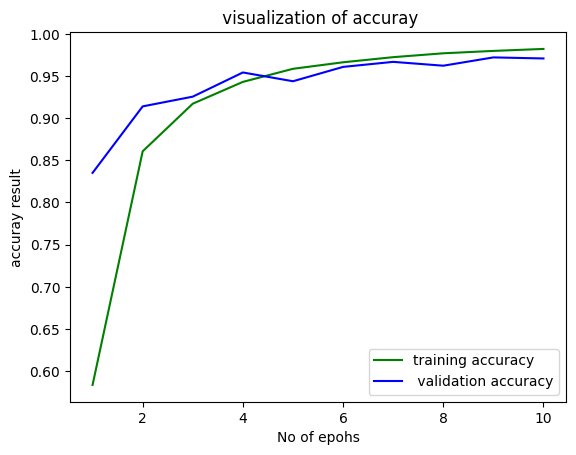

In [109]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color= 'green',label = 'training accuracy'),
plt.plot(epochs,training_history.history['val_accuracy'], color= 'blue',label = ' validation accuracy'),
plt.xlabel("No of epohs")
plt.ylabel("accuray result")
plt.title(" visualization of accuray")
plt.legend()
plt.show()

some other metris evaluation

In [113]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [114]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [115]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 125s 227ms/step


In [118]:
y_pred,y_pred.shape

(array([[9.99999940e-01, 1.89189608e-10, 2.22383362e-11, ...,
         1.47031044e-18, 7.67364006e-17, 1.18810474e-15],
        [9.99988139e-01, 4.21286177e-06, 2.03864889e-08, ...,
         5.24879077e-13, 1.88541752e-11, 1.38035625e-11],
        [9.99999940e-01, 8.07086365e-15, 6.18255404e-15, ...,
         5.29200312e-26, 7.22369839e-23, 7.80764592e-22],
        ...,
        [1.33249745e-10, 2.65088702e-14, 9.91777060e-09, ...,
         7.00118644e-11, 1.16870420e-11, 9.99998331e-01],
        [2.36347682e-12, 1.93642915e-17, 4.81774412e-11, ...,
         1.91506914e-11, 5.68374774e-13, 1.00000000e+00],
        [1.13890668e-13, 1.28645657e-16, 2.65351299e-13, ...,
         1.63103214e-13, 1.46882732e-11, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [120]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [122]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2024-10-16 08:36:16.922494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [123]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [130]:
pip install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [134]:
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

NameError: name 'classification_report' is not defined

In [136]:
cm = confusion_matrix(y_true,predicted_categories)

In [138]:
print(cm.shape)

(38, 38)


cconfustion matrix visulation

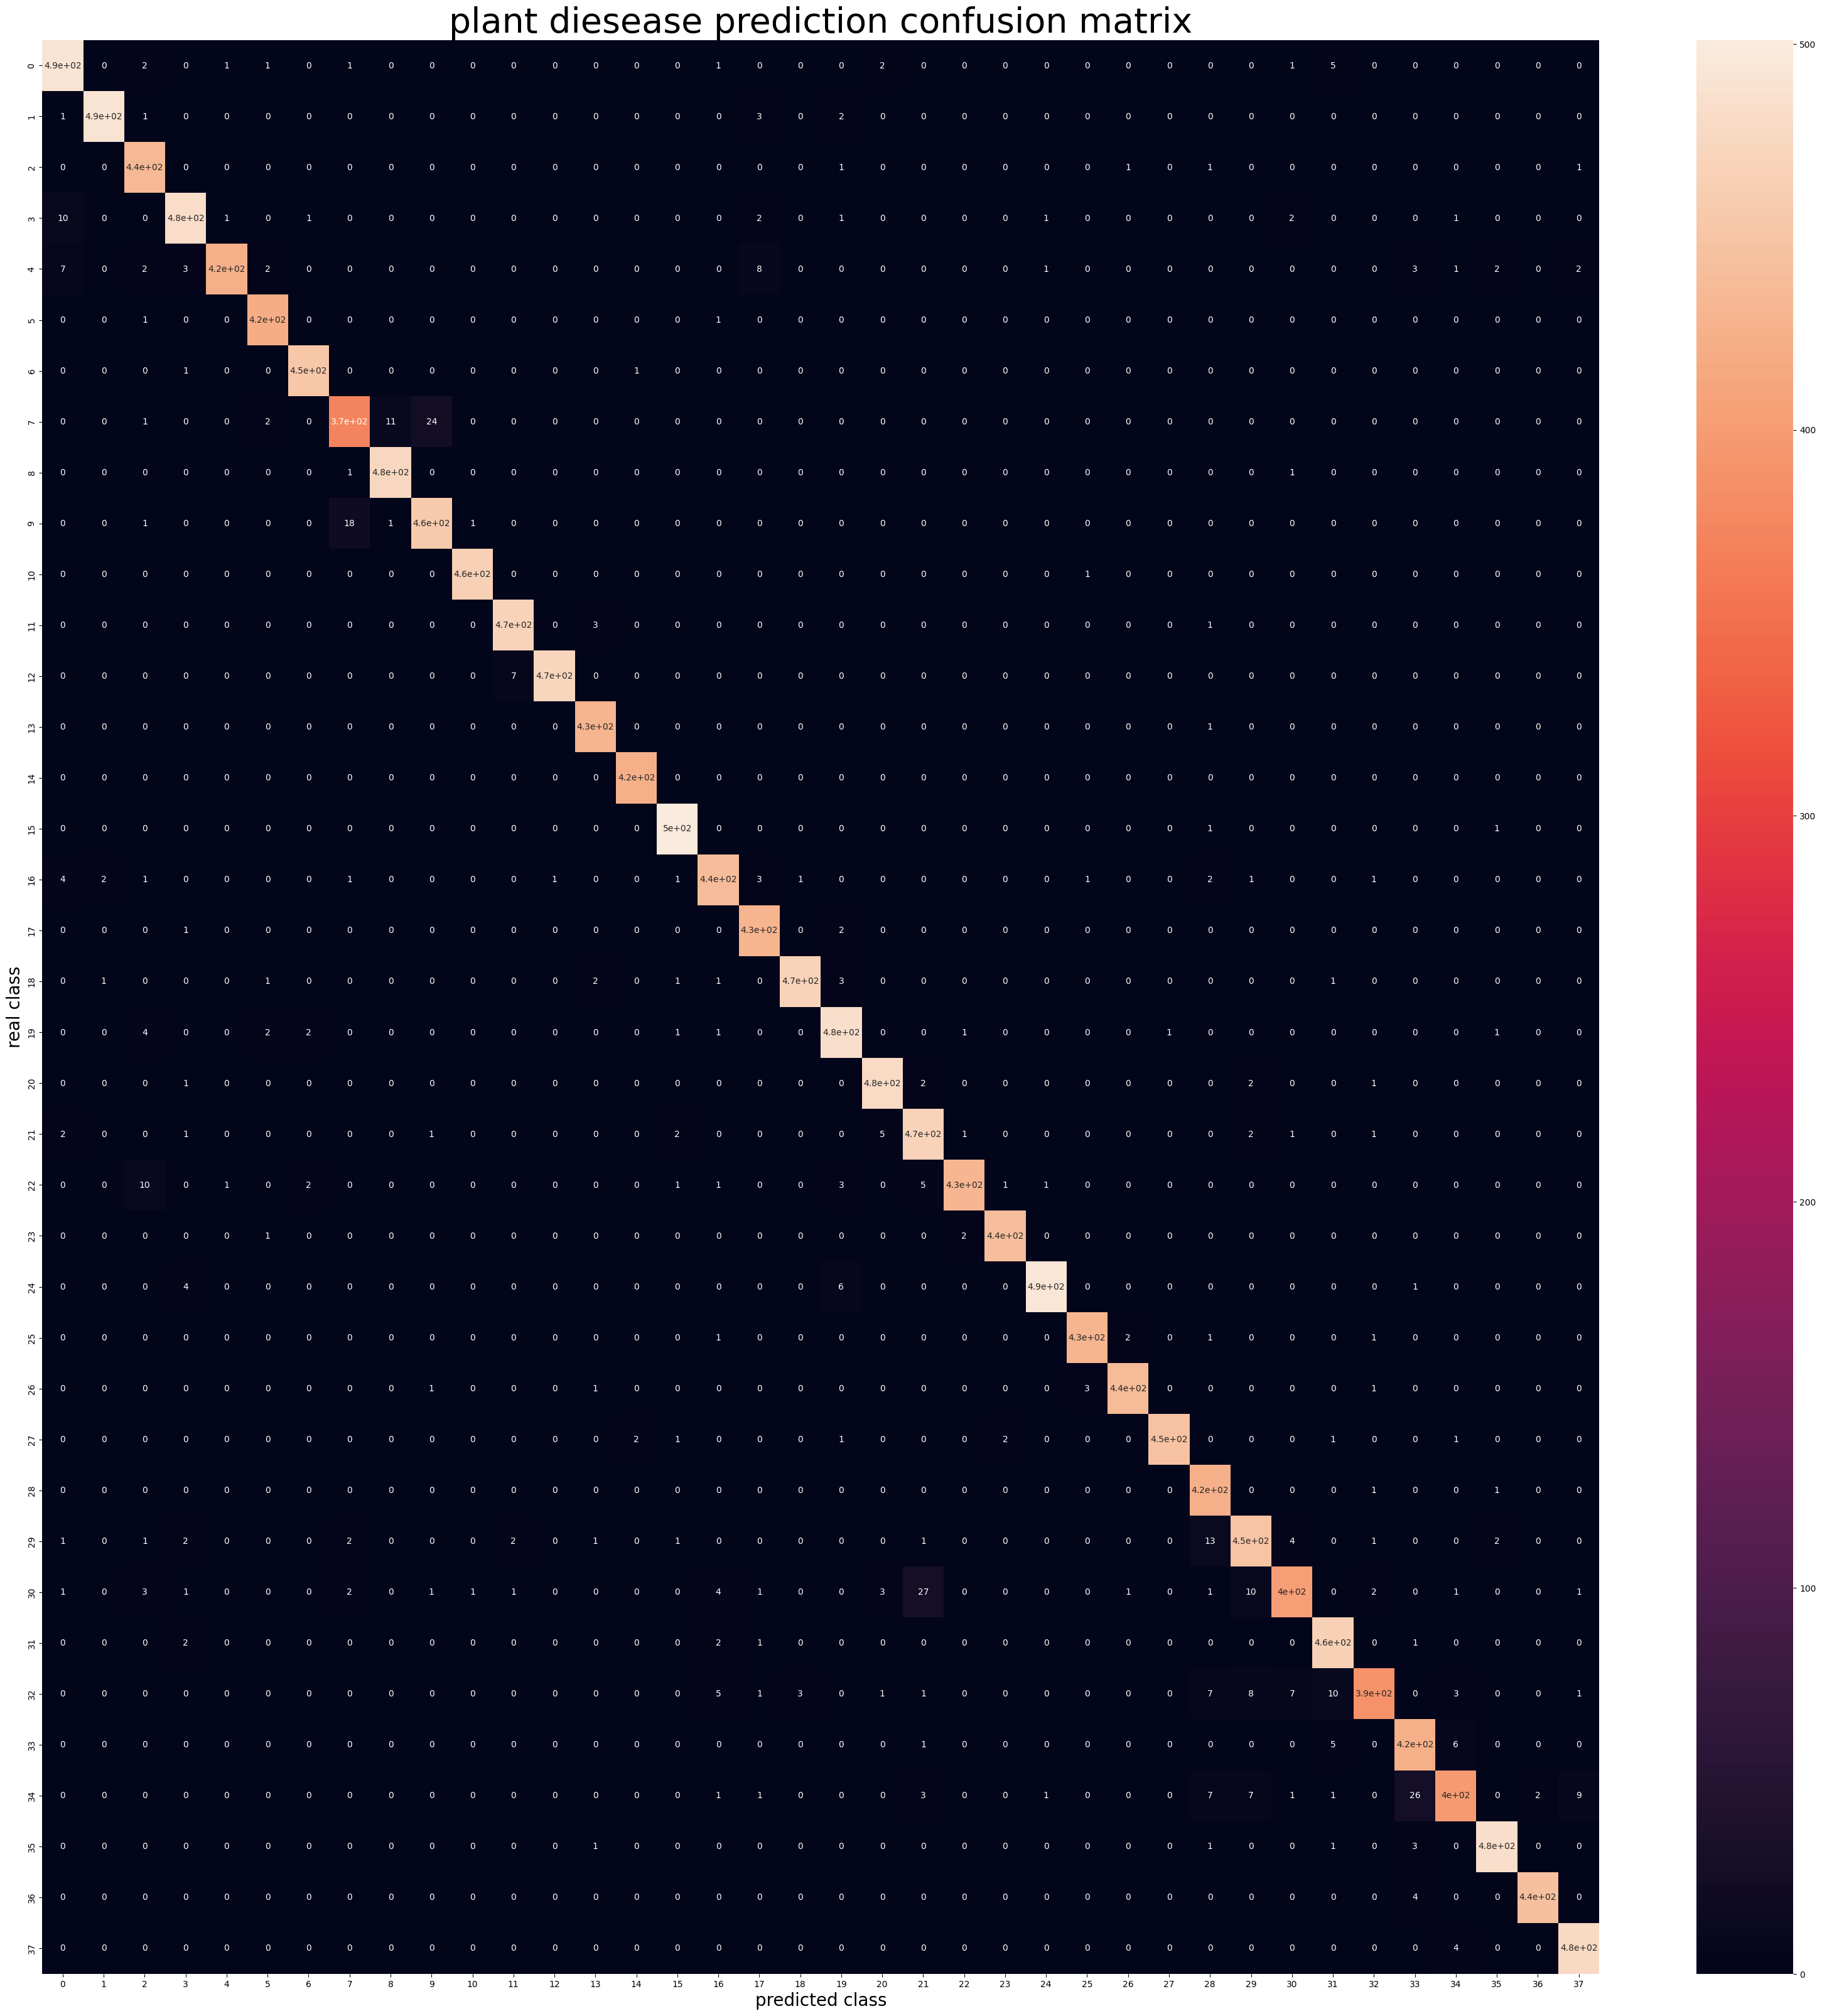

In [150]:
plt.figure(figsize=(40,40))  
sns.heatmap(cm,annot=True)
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("real class",fontsize=20)
plt.title("plant diesease prediction confusion matrix",fontsize = 40)
plt.show()